In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import false_discovery_control
from sklearn.metrics import roc_auc_score
import pandas as pd
import random
import matplotlib.pyplot as plt
from rdkit import Chem
import math

In [3]:
top100k = np.load("Top_ZINC_ACC2_SMILES.npy")

In [2]:
usp30files = []
for i in range(10):
    with open(f"../ZINC/ZINC0{i}.npy", "rb") as file:
        usp30files.append(np.load(file))
usp30pred = np.concatenate(usp30files)

In [4]:
acc2files = []
for i in range(10):
    with open(f"../ZINC/ZINC1{i}.npy", "rb") as file:
        acc2files.append(np.load(file))
acc2pred = np.concatenate(acc2files)

In [5]:
zinc = pd.read_csv("../ZINC/filtered_ZINC_InStock_compounds.csv")

In [6]:
smiles = zinc["smiles"].tolist()

In [9]:
acc2pred[smiles.index(top100k[-30000])]

0.9586853

In [6]:
pairs = [(usp30pred[i], smiles[i]) for i in range(len(usp30pred))]

In [14]:
[x[1] for x in sorted(pairs, key=lambda x:-x[0])[:1000]]

['N#Cc1cccc(N2CCC(c3ccsc3)CC2)n1',
 'N#Cc1cccc(N[C@H]2CCCN(Cc3ccccn3)C2)n1',
 'N#Cc1cccc(N[C@@H]2CCCN(Cc3ccccn3)C2)n1',
 'N#Cc1cccc(N2CCC([C@H](O)c3cccs3)CC2)n1',
 'N#Cc1cccc(N2CCC([C@@H](O)c3cccs3)CC2)n1',
 'N#Cc1csc(CN[C@H]2CCCN(c3cccnn3)C2)c1',
 'N#Cc1csc(CN[C@@H]2CCCN(c3cccnn3)C2)c1',
 'c1ccc(-c2nccc(=N[C@@H]3CN4CCC3CC4)[nH]2)cc1',
 'N#Cc1ccc(N2C[C@@H]3CN(c4ccccc4)C[C@H]3C2)nc1',
 'N#Cc1ccc(N2C[C@H]3CN(c4ccccc4)C[C@@H]3C2)nc1',
 'N#Cc1ccc(N2C[C@@H]3CN(c4ccccc4)C[C@@H]3C2)nc1',
 'CN1CCC[C@@H](c2csc(Nc3ccccn3)n2)C1',
 'CN1CCC[C@H](c2csc(Nc3ccccn3)n2)C1',
 'CN1CCC[C@@H](CNS(=O)(=O)Cc2ccon2)[C@@H]1c1ccccc1',
 'CN1CCC[C@H](CNS(=O)(=O)Cc2ccon2)[C@@H]1c1ccccc1',
 'CN1CCC[C@@H](CNS(=O)(=O)Cc2ccon2)[C@H]1c1ccccc1',
 'CN1CCC[C@H](CNS(=O)(=O)Cc2ccon2)[C@H]1c1ccccc1',
 'C#Cc1cccc(NC2CCN(c3nccs3)CC2)c1',
 'N#Cc1cccc(N[C@H]2CCCCN(Cc3ccccn3)C2)n1',
 'N#Cc1cccc(N[C@@H]2CCCCN(Cc3ccccn3)C2)n1',
 'N#CC1CCN(c2nc(-c3ccccc3)cs2)CC1',
 'CC1CCN(/C(N)=C(\\C#N)c2nc(-c3ccccc3)cs2)CC1',
 'OCC#Cc1csc(CN2CCC[C@

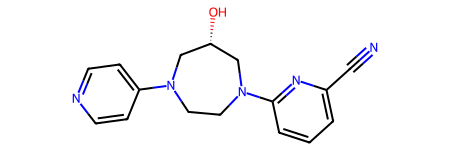

In [8]:
Chem.MolFromSmiles("N#Cc1cccc(N2CCN(c3ccncc3)C[C@H](O)C2)n1")

In [7]:
apairs = [(smiles[i], acc2pred[i]) for i in range(len(acc2pred))]

In [9]:
apairs = sorted(apairs, key=lambda x: -x[1])

In [11]:
rankedsmiles = [x[0] for x in apairs]

In [12]:
nprankedsmiles = np.array(rankedsmiles)

In [13]:
np.save("ZINC_ACC2_SMILES.npy", nprankedsmiles)

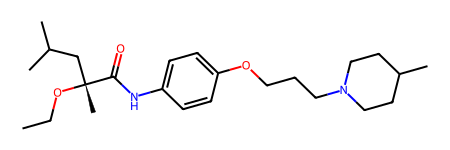

In [11]:
Chem.MolFromSmiles("CCO[C@](C)(CC(C)C)C(=O)Nc1ccc(OCCCN2CCC(C)CC2)cc1")